# Liste des choses à faire
- input: 2x14x14 images, output: bool = first is <= second images
- generate 1000 pairs for training & testing (given)
- do 2 architectures: weight sharing, auxilliary loss
- asses performance and compare
- note: we can use the class labels of each image to train, along with boolean value
- do a convnet (?) with 25 epochs & 70k params
- 

In [16]:
import torch
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
from dlc_practical_prologue import *

In [140]:
from torch import optim

def train_model(model, train_input, train_target, mini_batch_size, nb_epochs=25):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 1e-1)

    for e in range(nb_epochs):
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            loss.backward()
            optimizer.step()


def compute_nb_errors(model, data_input, data_target):

    nb_data_errors = 0

    for b in range(0, data_input.size(0), mini_batch_size):
        output = model(data_input.narrow(0, b, mini_batchsize))
        , predicted_classes = torch.max(output, 1)
        for k in range(mini_batch_size):
            if data_target[b + k] != predicted_classes[k]:
                nb_data_errors = nb_data_errors + 1

    return nb_data_errors

In [143]:
from torch import nn
from torch.nn import functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(14*14*2, 50)
        self.fc2 = nn.Linear(50, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x.view(-1,2*14*14)))
        x = F.relu(self.fc2(x))
        x = (self.fc3(x) > 0).to(torch.int64)
        return x

In [144]:
model = Net()

train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(2)

mean, std = train_input.mean(), train_input.std()
train_input.sub_(mean).div_(std)
test_input.sub_(mean).div_(std)

mini_batch_size = 2
nb_epochs = 25
                                                                                                     
train_model(model, train_input, train_target, mini_batch_size, nb_epochs)


print('train_error {:.02f}% test_error {:.02f}%'.format( \
            compute_nb_errors(model, train_input, train_target) / train_input.size(0) * 100,
            compute_nb_errors(model, test_input, test_target) / test_input.size(0) * 100 ))


RuntimeError: "log_softmax_lastdim_kernel_impl" not implemented for 'Long'

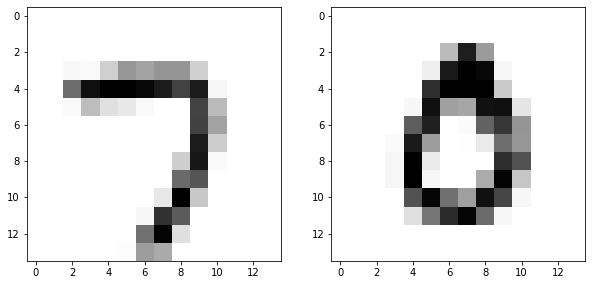

Expected output: 0 (the digits are 7 and 0)


In [119]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,20))
fig.add_subplot(1,2,1)
plt.imshow(train_input[0,0], cmap="Greys")
fig.add_subplot(1,2,2)
plt.imshow(train_input[0,1], cmap="Greys")
plt.show()
print("Expected output: {} (the digits are {} and {})".format(train_target[0], train_classes[0][0], train_classes[0][1]))